In [ ]:
import os
os.chdir('../')

In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *

Loading imports


In [2]:
torch.cuda.set_device(3)

In [3]:
dls_feat = get_3d_dls_feat(Meta.df_comb, path=path_feat_384avg, bs=32)

## Model

In [4]:
name = 'train3d_baseline_feat'
m = get_3d_head()
learn = get_learner(dls_feat, m, name=name)

In [5]:
learn.add_cb(DePadLoss())

## Training

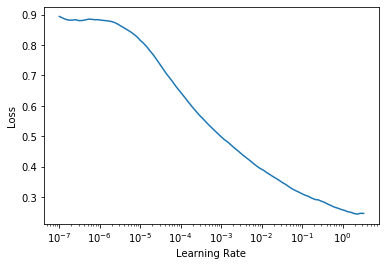

In [10]:
learn.lr_find()

In [6]:
do_fit(learn, 10, 1e-1)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.063435,0.082866,0.973643,0.955478,06:42
1,0.062048,0.076210,0.975594,0.956089,01:47
2,0.062370,0.074234,0.977510,0.957642,01:50
3,0.057995,0.079312,0.974142,0.948896,01:50
4,0.059673,0.081443,0.976555,0.952906,01:52
5,0.053181,0.070982,0.978460,0.958915,01:51
6,0.052112,0.070049,0.977977,0.958330,04:13
7,0.046554,0.076645,0.977531,0.955962,03:29
8,0.045557,0.070976,0.978392,0.958622,01:50
9,0.042570,0.069700,0.978464,0.958750,01:51


## Testing

In [6]:
learn.dls = get_3d_dls_feat(Meta.df_tst, path=path_feat_tst_384avg, bs=32, test=True)

In [12]:
sub_fn = f'subm/{name}'
learn.load(f'runs/{name}-1')

In [9]:
preds,targs = learn.get_preds()
preds.shape, preds.min(), preds.max()

In [13]:
pred_csv = submission(Meta.df_tst, preds, fn=sub_fn)

In [14]:
api.competition_submit(f'{sub_fn}.csv', name, 'rsna-intracranial-hemorrhage-detection')

100%|██████████| 26.0M/26.0M [00:02<00:00, 9.76MB/s]


Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [15]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 14320186,
 'totalBytes': 27277209,
 'date': '2020-01-29T08:02:00.56Z',
 'description': 'train3d_baseline_feat',
 'errorDescription': None,
 'fileName': 'train3d_baseline_feat.csv',
 'publicScore': '1.76111',
 'privateScore': '0.05472',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/14320186/14320186.raw'}